In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [45]:
# creates pressure columns which is average pressure for the day
df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

In [46]:
# change date column to type datetime
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
# create average temperature column which is the average of MinTemp and MaxTemp
df['avg_temp'] = (df['MinTemp'] + df['MaxTemp']) / 2

In [48]:
# keep only the avg_temp, rainfall, and pressure columns
df = df[['avg_temp', 'Rainfall', 'Pressure']]

In [49]:
# exports data as CSV
df.to_csv('final_data.csv')

In [50]:
# create the temperature bins and assign the average rainfall for that temp range in each
zero_five = df[(df['avg_temp'] >= 0) & (df['avg_temp'] < 5)]['Rainfall'].mean()
five_ten = df[(df['avg_temp'] >= 5) & (df['avg_temp'] < 10)]['Rainfall'].mean()
ten_fifteen = df[(df['avg_temp'] >= 10) & (df['avg_temp'] < 15)]['Rainfall'].mean()
fifteen_twenty = df[(df['avg_temp'] >= 15) & (df['avg_temp'] < 20)]['Rainfall'].mean()
twenty_twentyfive = df[(df['avg_temp'] >= 20) & (df['avg_temp'] < 25)]['Rainfall'].mean()
twentyfive_thirty = df[(df['avg_temp'] >= 25) & (df['avg_temp'] < 30)]['Rainfall'].mean()
thirty_thirtyfive = df[(df['avg_temp'] >= 30) & (df['avg_temp'] < 35)]['Rainfall'].mean()

In [51]:
# gets average pressure values for each bin
zero_five_p = df[(df['avg_temp'] >= 0) & (df['avg_temp'] < 5)]['Pressure'].mean()
five_ten_p = df[(df['avg_temp'] >= 5) & (df['avg_temp'] < 10)]['Pressure'].mean()
ten_fifteen_p = df[(df['avg_temp'] >= 10) & (df['avg_temp'] < 15)]['Pressure'].mean()
fifteen_twenty_p = df[(df['avg_temp'] >= 15) & (df['avg_temp'] < 20)]['Pressure'].mean()
twenty_twentyfive_p = df[(df['avg_temp'] >= 20) & (df['avg_temp'] < 25)]['Pressure'].mean()
twentyfive_thirty_p = df[(df['avg_temp'] >= 25) & (df['avg_temp'] < 30)]['Pressure'].mean()
thirty_thirtyfive_p = df[(df['avg_temp'] >= 30) & (df['avg_temp'] < 35)]['Pressure'].mean()

In [52]:
# create final dataframe to be exported as csv file
bar_data = [{'temperature': '[0, 5)', 'rainfall': zero_five, 'average_pressure': zero_five_p},
            {'temperature': '[5, 10)', 'rainfall': five_ten, 'average_pressure': five_ten_p},
            {'temperature': '[10, 15)', 'rainfall': ten_fifteen, 'average_pressure': ten_fifteen_p},
            {'temperature': '[15, 20)', 'rainfall': fifteen_twenty, 'average_pressure': fifteen_twenty_p},
            {'temperature': '[20, 25)', 'rainfall': twenty_twentyfive, 'average_pressure': twenty_twentyfive_p},
            {'temperature': '[25, 30)', 'rainfall': twentyfive_thirty, 'average_pressure': twentyfive_thirty_p},
            {'temperature': '[30, 35)', 'rainfall': thirty_thirtyfive, 'average_pressure': thirty_thirtyfive_p}]
bar_df = pd.DataFrame(bar_data)

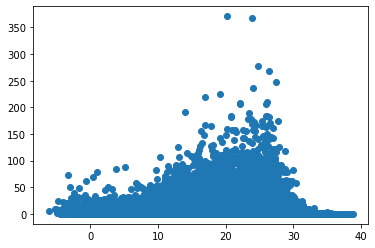

In [54]:
plt.scatter(df['avg_temp'], df['Rainfall'])

In [53]:
# export csv file
bar_df.to_csv('bar_data.csv')